In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Create scaler

scaler = lambda x: (x - np.mean(x, axis=0))/np.std(x, axis=0)

In [6]:
df = pd.read_csv('../datasets/Johnson_Kansas.csv', parse_dates=['timestamp'])
df.head(3)


,id,longitude,latitude,timestamp,doy,pr,rmax,rmin,sph,srad,...,tmmn,tmmx,vs,erc,eto,bi,fm100,fm1000,etr,vpd
0,19800101,-94.822258,38.883761,1980-01-01,1,0.0,77.683876,43.286247,0.002620,8.263647,...,-3.557654,7.847253,2.192723,40.656410,1.040586,29.367460,13.726248,13.835570,1.627161,0.353715
1,19800102,-94.822258,38.883761,1980-01-02,2,0.0,78.571579,35.635567,0.002420,7.208553,...,-3.577643,5.967126,3.296802,41.918404,1.219669,35.399471,13.522950,13.820871,1.931061,0.320570
2,19800103,-94.822258,38.883761,1980-01-03,3,0.0,82.316978,39.000980,0.001985,5.930851,...,-7.448096,0.307275,3.042193,40.172096,0.770442,32.923172,13.797589,13.864967,1.172392,0.174911


In [7]:
X = df[['srad','tmmn','tmmx']].values
y = df['eto'].values
numHid = 10

X = scaler(X)

In [42]:
stopping = 10
#def NeuralNetTrain(X, y, numHid, stopping, activation):


fhidden = sigmoid
f1hidden = sigmoid_derivative
foutput = sigmoid
f1output = sigmoid_derivative

rowIn, colIn = X.shape
colOut = 1
Bias = np.ones((X.shape[0], 1))
W1 = -1 + (1 - (-1)) * np.random.rand(colIn + 1, numHid)
W2 = -1 + (1 - (-1)) * np.random.rand(numHid + 1,)
learningRate = 0.6
momentum = 0.3
OutputCalib = np.empty_like(y)
deltaW1 = np.zeros_like(W1)
deltaW2 = np.zeros_like(W2)
rmse = np.empty(stopping)

InputOut = np.hstack((X, Bias))
for i in range(stopping):
    HiddenSum = np.dot(InputOut, W1)
    HiddenLayer = fhidden(HiddenSum)
    HiddenOut = np.hstack((HiddenLayer, Bias))
    OutputSum = np.dot(HiddenOut, W2)
    OutputCalib = foutput(OutputSum)

    error = y - OutputCalib
    gradientOutput = error * f1output(OutputSum)
    deltaW2 = learningRate * np.dot(HiddenOut.T, gradientOutput) + momentum * deltaW2

    gradientHidden = f1hidden(HiddenSum) * np.dot(gradientOutput, W2[:numHid].T)
    deltaW1 = learningRate * np.dot(InputOut.T, gradientHidden) + momentum * deltaW1

    W2 = deltaW2 / rowIn + W2
    W1 = deltaW1 / rowIn + W1

    rmse[i] = np.sqrt(np.mean(error**2))

    #if rmse[i] < stopping:
    #    break

#TrainParam = {
#    'W1': W1,
#    'W2': W2,
#    'activation': activation,
#    'rmse': rmse
#}

#return OutputCalib, TrainParam


ValueError: shapes (14976,) and (10,) not aligned: 14976 (dim 0) != 10 (dim 0)

In [43]:
gradientOutput.shape

(14976,)

In [39]:
OutputCalib.shape

(14976,)

In [40]:
y.shape

(14976,)

In [41]:
(y - OutputCalib).shape

(14976,)

In [22]:
def NeuralNetPredict(Input, CalibSet, TrainParam):
    sigmoid = lambda x: 1 / (1 + np.exp(-x))
    tanh lambda: x:np.tanh(x)

    activation = TrainParam['activation']
    Bias = np.ones((Input.shape[0], 1))
    W1 = TrainParam['W1']
    W2 = TrainParam['W2']

    if activation == 'sigmoid-sigmoid':
        fhidden = sigmoid
        foutput = fhidden
    elif activation == 'tanh-sigmoid':
        fhidden = tanh
        foutput = sigmoid
    elif activation == 'tanh-tanh':
        fhidden = tanh
        foutput = fhidden

    InputOut = np.hstack((Input, Bias))

    HiddenSum = np.dot(InputOut, W1)
    HiddenLayer = fhidden(HiddenSum)
    HiddenOut = np.hstack((HiddenLayer, Bias))

    OutputSum = np.dot(HiddenOut, W2)
    OutputLayer = foutput(OutputSum)

    OutputPrediction = {'Prediction': OutputLayer}

    if CalibSet.size != 0:
        error = CalibSet - OutputLayer
        rmse = np.sqrt(np.mean(error**2))
        OutputPrediction['rmse'] = rmse

    return OutputPrediction


(14976, 14976)

In [4]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


array([0, 1, 2, ..., 8, 9, 8])

In [5]:
# Create scaler
scaler = lambda x: (x - np.mean(x, axis=0))/np.std(x, axis=0)

# Define the activation function (sigmoid)
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Define the derivative of the activation function
sigmoid_derivative = lambda x: x * (1 - x)

sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_derivative = lambda x: np.exp(x) / (np.exp(2*x) + 2*np.exp(x) + 1)

tanh = lambda x: np.tanh(x)
tanh_derivative = lambda x: 1 - np.tanh(x)**2



In [6]:
# Read some data
df = pd.read_csv('../datasets/kings_creek_2022_2023_hourly.csv', parse_dates=['datetime'])
df.head(3)


,datetime,pressure,tavg,rhavg,prcp,srad,wspd,wdir,vpd,vwc_5cm,vwc_20cm,vwc_40cm,soiltemp_5cm,soiltemp_20cm,soiltemp_40cm,battv,discharge
0,2022-01-01 00:00:00,96.40,-4.4,98.012,0.0,NaN,5.94,0.717,0.01,0.257,0.307,0.359,5.2,6.7,7.6,8745.0,0.0
1,2022-01-01 01:00:00,96.39,-5.2,97.873,0.0,NaN,6.22,4.717,0.01,0.257,0.307,0.359,4.9,6.6,7.6,8719.0,0.0
2,2022-01-01 02:00:00,96.44,-6.1,95.025,0.0,NaN,5.56,0.717,0.02,0.257,0.307,0.359,4.7,6.5,7.6,8719.0,0.0


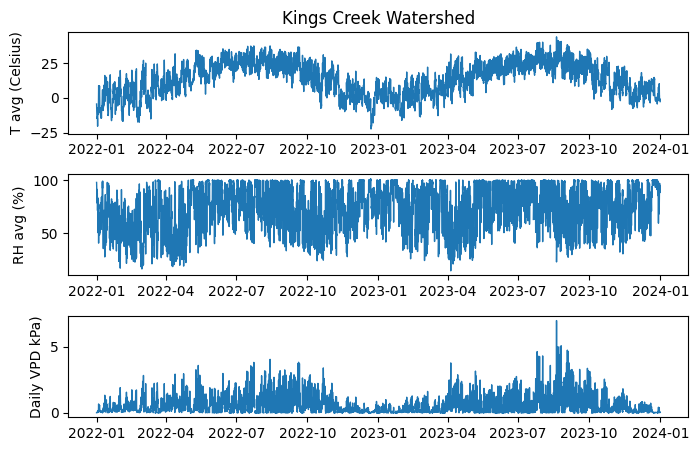

In [7]:
# Inspect input data
plt.figure(figsize=(8,5))

plt.subplot(3,1,1)
plt.title('Kings Creek Watershed')
plt.plot(df['datetime'], df['tavg'], linewidth=1)
plt.ylabel('T avg (Celsius)')

plt.subplot(3,1,2)
plt.plot(df['datetime'], df['rhavg'], linewidth=1)
plt.ylabel('RH avg (%)')

plt.subplot(3,1,3)
plt.plot(df['datetime'], df['vpd'], linewidth=1)
plt.ylabel('Daily VPD kPa)')

plt.subplots_adjust(hspace=0.4)
plt.show()


In [21]:
# Define inputs and target outputs
X = df[['tavg','rhavg']].values

# Normalize inputs
X = scaler(X)

# Define the target output
target_output = df['vpd'].values

# Convert targets to 2D array if are 1D
if target_output.ndim == 1:
    target_output = target_output.reshape(-1, 1)
    

In [22]:
print(X.shape)
print(target_output.shape)

(17520, 2)
(17520, 1)


In [93]:
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
X = scaler(X)

# Define the target output
target_outputs = np.array([[6,2],
                           [15,5],
                           [24,8]])

In [64]:
print(X.shape)
print(target_output.shape)

(3, 3)
(3, 2)


In [70]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(random_state=1, hidden_layer_sizes=(4,), max_iter=100,
                   learning_rate_init=0.001, momentum=0.9,
                   activation='logistic', solver='sgd').fit(X, target_output)
clf.predict(X)

/Users/andrespatrignani/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[ 7.76996419,  2.62593997],
       [16.34605429,  5.48837896],
       [20.12093717,  6.75712196]])

In [143]:
from sklearn.datasets import load_digits

# Define the input (samples x features)
X = load_digits().data

# Define labels
all_labels = load_digits().target


In [144]:
unique_labels = np.unique(all_labels)
target_outputs = np.zeros( (all_labels.size, len(unique_labels)) )
for k,label in enumerate(unique_labels):
    idx_label = all_labels == label
    target_outputs[idx_label,k] = 1

In [145]:
# Transpose X
X = X.T
target_outputs = target_outputs.T

The `learning rate` controls the step size of the weight and bias updates, while `momentum` controls the contribution of the previous weight updates to the current update. The previous weight updates are stored and used in the calculation of the current weight updates to incorporate momentum.

In [146]:
# Define the neural network architecture
input_size = 64
hidden_size = 10
output_size = 10

# Define learning rate and momentum
learning_rate = 0.001
momentum = 0.95
iterations = 1

# Initialize weights
np.random.seed(0)
weights_input_hidden = np.random.rand(hidden_size, input_size)
weights_hidden_output = np.random.rand(output_size, hidden_size)

# Initialize biases
bias_hidden = np.random.randn(hidden_size, 1)
bias_output = np.random.randn(output_size, 1)

# Define the activation function (sigmoid)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_derivative = lambda x: x * (1 - x) # x is the sigmoid function
relu = lambda x: np.maximum(x,0)
relu_derivative = lambda x: x > 0
softmax = lambda x: np.exp(x) / np.sum(np.exp(x)) # sum of all rows for each column

for k in range(iterations):
    
    # Feed-forward propagation
    hidden_layer_input = np.dot(weights_input_hidden, X) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)
    output_layer_input = np.dot(weights_hidden_output, hidden_layer_output) + bias_output
    output = softmax(output_layer_input)

    # Backpropagation
    error = target_outputs - output
    output_gradient = relu_derivative(output)
    delta_output = error * output_gradient

    error_hidden_layer = np.dot(weights_hidden_output.T, delta_output)
    hidden_layer_gradient = sigmoid_derivative(hidden_layer_output)
    delta_hidden_layer = error_hidden_layer * hidden_layer_gradient

    # Initialize previous weight updates for momentum
    prev_weight_update_input_hidden = np.zeros_like(weights_input_hidden)
    prev_weight_update_hidden_output = np.zeros_like(weights_hidden_output)
    prev_bias_update_hidden = np.zeros_like(bias_hidden)
    prev_bias_update_output = np.zeros_like(bias_output)

    # Update weights and biases with momentum
    weight_update_input_hidden = learning_rate * X.T.dot(delta_hidden_layer) + momentum * prev_weight_update_input_hidden
    bias_update_hidden = learning_rate * np.sum(delta_hidden_layer, axis=0, keepdims=True) + momentum * prev_bias_update_hidden
    weight_update_hidden_output = learning_rate * hidden_layer_output.T.dot(delta_output) + momentum * prev_weight_update_hidden_output
    bias_update_output = learning_rate * np.sum(delta_output, axis=0, keepdims=True) + momentum * prev_bias_update_output

    weights_input_hidden += weight_update_input_hidden
    bias_hidden += bias_update_hidden
    weights_hidden_output += weight_update_hidden_output
    bias_output += bias_update_output

    # Update previous weight updates for momentum
    prev_weight_update_input_hidden = weight_update_input_hidden
    prev_bias_update_hidden = bias_update_hidden
    prev_weight_update_hidden_output = weight_update_hidden_output
    prev_bias_update_output = bias_update_output

print("Output after training:")
print(output)

/var/folders/w1/cgh8d8y962g9c6p4_dxgbn2jh5jy11/T/ipykernel_72267/1174399859.py:25: RuntimeWarning: overflow encountered in exp
  softmax = lambda x: np.exp(x) / np.sum(np.exp(x)) # sum of all rows for each column
/var/folders/w1/cgh8d8y962g9c6p4_dxgbn2jh5jy11/T/ipykernel_72267/1174399859.py:25: RuntimeWarning: invalid value encountered in divide
  softmax = lambda x: np.exp(x) / np.sum(np.exp(x)) # sum of all rows for each column


ValueError: shapes (1797,64) and (10,1797) not aligned: 64 (dim 1) != 10 (dim 0)

In [77]:
hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
output = sigmoid(output_layer_input)

In [80]:
bias_hidden

array([[0.76103773, 0.12167502, 0.44386323, 0.33367433]])

In [76]:
delta_output.dot(weights_hidden_output.T)

ValueError: shapes (3,2) and (1,4) not aligned: 2 (dim 1) != 1 (dim 0)

In [45]:
# Define the input for prediction
X_new = np.array([[2, 3, 4]])

# Forward propagation for prediction
hidden_layer_input_new = np.dot(X_new, weights_input_hidden) + bias_hidden
hidden_layer_output_new = sigmoid(hidden_layer_input_new)
output_layer_input_new = np.dot(hidden_layer_output_new, weights_hidden_output) + bias_output
output_new = sigmoid(output_layer_input_new)

print("Prediction:")
print(output_new)

Prediction:
[[0.88524733 0.1465005 ]]
